# Foundations of Data Analysis
## Lab Assignment 2

**Task 1) Dimensionality Reduction, Latent Semantic Indexing (30 P)**

In [1]:
##  !/usr/bin/env python3

import pprint # pretty printer
import logging
from sklearn.datasets import fetch_20newsgroups
from fda_helper import preprocess_data
from gensim import corpora, models, similarities
from gensim.models import LsiModel
import numpy as np
from numpy import loadtxt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn import metrics
import matplotlib.pyplot as plt
import random
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

## Code from fda_helper.py
def preprocess_data(doc_set):
    # initialize regex tokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    # create English stop words list
    en_stop = set(stopwords.words('english'))
    # Create p_stemmer of class PorterStemmer
    p_stemmer = PorterStemmer()
    # list for tokenized documents in loop
    texts = []
    # loop through document list    
    for i in doc_set:
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        # add tokens to list
        texts.append(stemmed_tokens)
    return texts

##  Code from lsi_template.py
##  enable logging to display what is happening
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# read dataset 20newsgroups
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data

texts = preprocess_data(documents)
dictionary = corpora.Dictionary(texts)

##  according to GENSIM documentation this is the corpus
bow_corpus = [dictionary.doc2bow(text) for text in texts] # bow = Bag Of Words --> Counts all the words in a document and then just stores the word together with the word count. 
## pprint.pprint(bow_corpus[5]) # one example document, words maped to ids

tfidf = models.TfidfModel(bow_corpus) # train tf-idf model
corpus_tfidf = tfidf[bow_corpus] # apply transformation on the whole corpus

2020-06-04 11:48:15,236 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-06-04 11:48:16,846 : INFO : adding document #10000 to Dictionary(79394 unique tokens: ['act', 'atroc', 'austria', 'away', 'bias']...)
2020-06-04 11:48:17,097 : INFO : built Dictionary(84023 unique tokens: ['act', 'atroc', 'austria', 'away', 'bias']...) from 11314 documents (total 1438608 corpus positions)
2020-06-04 11:48:17,923 : INFO : collecting document frequencies
2020-06-04 11:48:17,924 : INFO : PROGRESS: processing document #0
2020-06-04 11:48:18,094 : INFO : PROGRESS: processing document #10000
2020-06-04 11:48:18,119 : INFO : calculating IDF weights for 11314 documents and 84023 features (789468 matrix non-zeros)


In [2]:
##  a)
##  TODO: transform your tfidf model into a LSI Model
##  using python gensim, use num_topics=200

##  Reference: https://radimrehurek.com/gensim/models/lsimodel.html
##  from gensim.models import LsiModel
lsimodel = LsiModel(corpus=corpus_tfidf, num_topics=200, id2word=dictionary)

##  gensim Documentation:
##  corpus ({iterable of list of (int, float)}, optional) – Stream of document vectors or sparse matrix of shape (num_terms, num_documents)
##  id2word (dict of {int: str}, optional) – ID to word mapping, optional

2020-06-04 11:48:18,390 : INFO : using serial LSI version on this node
2020-06-04 11:48:18,391 : INFO : updating model with new documents
2020-06-04 11:48:22,595 : INFO : preparing a new chunk of documents
2020-06-04 11:48:22,850 : INFO : using 100 extra samples and 2 power iterations
2020-06-04 11:48:22,851 : INFO : 1st phase: constructing (84023, 300) action matrix
2020-06-04 11:48:23,293 : INFO : orthonormalizing (84023, 300) action matrix
2020-06-04 11:48:29,366 : INFO : 2nd phase: running dense svd on (300, 11314) matrix
2020-06-04 11:48:29,966 : INFO : computing the final decomposition
2020-06-04 11:48:29,967 : INFO : keeping 200 factors (discarding 18.822% of energy spectrum)
2020-06-04 11:48:30,478 : INFO : processed documents up to #11314
2020-06-04 11:48:30,522 : INFO : topic #0(11.901): 0.128*"would" + 0.118*"use" + 0.116*"one" + 0.110*"1" + 0.106*"peopl" + 0.102*"know" + 0.101*"get" + 0.100*"like" + 0.094*"think" + 0.091*"2"
2020-06-04 11:48:30,526 : INFO : topic #1(7.028):

In [33]:
##  b)

size = len(documents) - 1
random_document = random.randint(0,size)
doc = documents[random_document]

##  Pick 10 different and random elements of the random document
tokenizer = RegexpTokenizer(r'\w+')
en_stop = set(stopwords.words('english'))
p_stemmer = PorterStemmer()
raw = doc.lower()
tokens = tokenizer.tokenize(raw)
stopped_tokens = [i for i in tokens if not i in en_stop]
stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
stemmed_tokens

counter = 0
tab = []
while counter < 10:
    t = random.choice(stemmed_tokens)
    if t not in tab:
        tab.append(t)
        counter = counter + 1
        
doc = tab

## Reference: https://radimrehurek.com/gensim/auto_examples/core/run_similarity_queries.html#sphx-glr-auto-examples-core-run-similarity-queries-py
vec_bow = dictionary.doc2bow(doc)
vec_lsi = lsimodel[vec_bow]  # convert the query to LSI space
index = similarities.MatrixSimilarity(lsimodel[corpus_tfidf])  # transform corpus to LSI space and index it
sims = index[vec_lsi]  # perform a similarity query against the corpus
sims = sorted(enumerate(sims), key=lambda item: -item[1])

## Output of the results
liste = []
for i, s in enumerate(sims):
    if len(liste) == 10:
        break
    else:
        liste.append(s)
    #if s != random_document:
        #liste.append(s)
    #else:
        #liste.append(s)
idx, similarity = map(list, zip(*liste))
y = 1
for i in range(10):
    if idx[i] == random_document:
        print("(The random Document was: " + str(idx[i]) + " Similarity: " + str(similarity[i]) +")")
    else:
        print(str(y) + "° Document: " + str(idx[i]) + " Similarity: " + str(similarity[i]))
        y = y+1

2020-06-04 12:11:42,732 : WARNING : scanning corpus to determine the number of features (consider setting `num_features` explicitly)
2020-06-04 12:11:48,453 : INFO : creating matrix with 11314 documents and 200 features


(The random Document was: 3228 Similarity: 0.7255006)
1° Document: 10597 Similarity: 0.65694237
2° Document: 2656 Similarity: 0.5593079
3° Document: 9679 Similarity: 0.55380166
4° Document: 7626 Similarity: 0.5153171
5° Document: 957 Similarity: 0.49255747
6° Document: 1115 Similarity: 0.48082653
7° Document: 10907 Similarity: 0.47643876
8° Document: 9970 Similarity: 0.46557623
9° Document: 5178 Similarity: 0.46553126


In [36]:
##  For the report: Compare similar documents

#print("Random Document: " + str(random_document) + "\n" + str(documents[random_document]) + "\n\n")
#print("10 Random:\n" + str(doc) + "\n")
#for i in range(5):
    #print("Document: " + str(idx[i]) + ":\n" + str(texts[idx[i]]) + "\n")

**Task 2) Clustering (30 P)**

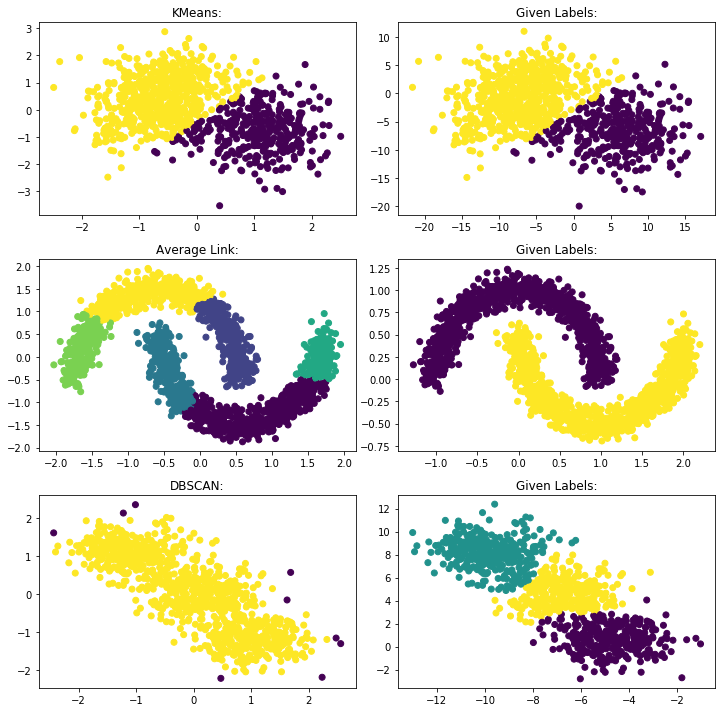

In [6]:
## Reference: Code from the Tutorial (Claus Hofmann)
data1 = np.loadtxt('noCluster2_1K.csv', skiprows=1, delimiter=',')
data2 = np.loadtxt('noCluster2_2K.csv', skiprows=1, delimiter=',')
data3 = np.loadtxt('noCluster3_1K.csv', skiprows=1, delimiter=',')
##  X, Y, class-label
##  right now we are not interested in the class-label
##  we will need them for the evaluation of the clusterings

##  Take only the first two columns
X = data1[:, :2]
Y = data2[:, :2]
Z = data3[:, :2]

##  Standardize: e.g. you could standardize the data, so that it has mean zero and variance 1
##  Reference: https://scikit-learn.org/stable/modules/preprocessing.html
##  Standardize a dataset along any axis
##  Center to the mean and component wise scale to unit variance.
X_scaled = preprocessing.scale(X)
Y_scaled = preprocessing.scale(Y)
Z_scaled = preprocessing.scale(Z)


##  KMeans:
##  Reference: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
##  initialize a new KMeans object:
kmeans = KMeans(n_clusters=2)
l_kmeans = kmeans.fit_predict(X_scaled) # fits KMeans model to the dataset and then predicts a cluster label for each of the elements in the dataset
##  Output: Labels
##  l_kmeans 
##  result: integers where each datapoint with the same integer corresponds to the same cluster


##  Average Link:
##  Reference: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering
avg_link = AgglomerativeClustering(n_clusters=6, linkage="average").fit(Y_scaled)
##  n_clusters = 2 (default)
##  linkage = "average"
##  Average uses the average of the distances of each observation of the two sets.
l_avg_link = avg_link.labels_
##  Output: All clustering results:
##  np.set_printoptions(threshold=np.inf)
##  l_avg_link
##  result: integers where each datapoint with the same integer corresponds to the same cluster


##  DBSCAN:
##  Reference: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
dbscan = DBSCAN(eps=0.3).fit(Z_scaled)

##  eps: float, default=0.5
##  The maximum distance between two samples for one to be considered as in the neighborhood of the other. 
##  This is not a maximum bound on the distances of points within a cluster. This is the most important DBSCAN 
##  parameter to choose appropriately for your data set and distance function.

##  min_samples: int, default=5
##  The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself.

l_dbscan = dbscan.labels_
##  Output: All clustering results:
##  np.set_printoptions(threshold=np.inf)
##  l_dbscan
##  result: integers where each datapoint with the same integer corresponds to the same cluster


##  Subplot of the results
fig, axs = plt.subplots(3, 2, figsize=(10, 10))
axs[0, 0].set_title('KMeans:')
axs[0, 0].scatter(X_scaled[:,0], X_scaled[:,1], c=l_kmeans)
axs[0, 1].set_title('Given Labels:')
axs[0, 1].scatter(data1[:,0], data1[:,1], c=data1[:,2])
axs[1, 0].set_title('Average Link:')
axs[1, 0].scatter(Y_scaled[:,0], Y_scaled[:,1], c=l_avg_link)
##  single linkage wäre laut Dokumentation besser geeignet!
axs[1, 1].set_title('Given Labels:')
axs[1, 1].scatter(data2[:,0], data2[:,1], c=data2[:,2])
axs[2, 0].set_title('DBSCAN:')
axs[2, 0].scatter(Z_scaled[:,0], Z_scaled[:,1], c=l_dbscan)
axs[2, 1].set_title('Given Labels:')
axs[2, 1].scatter(data3[:,0], data3[:,1], c=data3[:,2])

fig.tight_layout()
fig.savefig('subplot.png')

NMI-Scores:

KMeans: 1.0
Average Link: 0.5745449281860466
DBSCAN: 0.002340370027175728


Silhouette-Scores:

KMeans: 0.46587594707768026
Average Link: 0.4539471271769655
DBSCAN: 0.3486035928325873


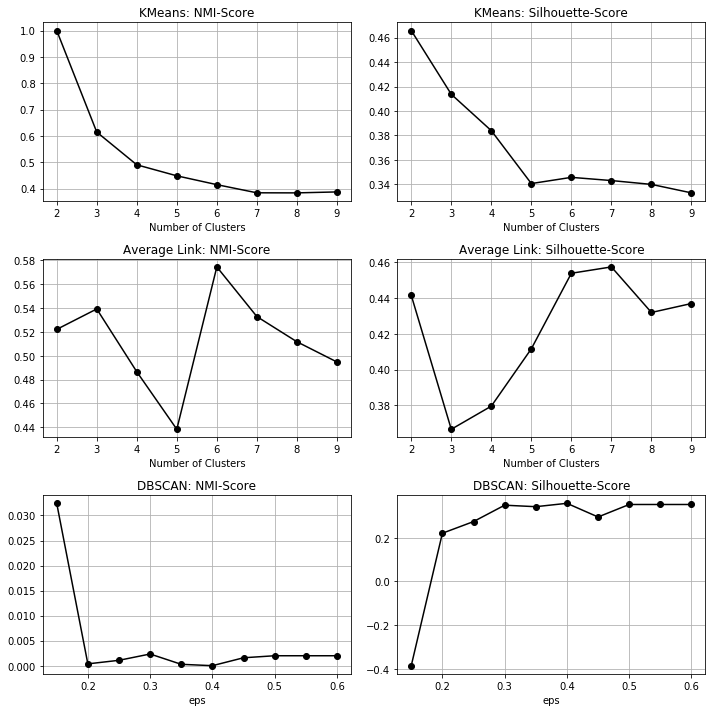

In [7]:
##  Evaluate the clustering

##  Normalized Mutual Info Score (NMI-Score)
##  Reference: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.normalized_mutual_info_score.html

k = normalized_mutual_info_score(data1[:,2], l_kmeans)
a = normalized_mutual_info_score(data2[:,2], l_avg_link)
d = normalized_mutual_info_score(data3[:,2], l_dbscan)

print("NMI-Scores:\n\n" + "KMeans: " + str(k) + "\n" + "Average Link: " + str(a) + "\n" + "DBSCAN: " + str(d))

##  Silhouette Score
##  Reference: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score

k2 = metrics.silhouette_score(X_scaled, l_kmeans, metric='euclidean')
a2 = metrics.silhouette_score(Y_scaled, l_avg_link, metric='euclidean')
d2 = metrics.silhouette_score(Z_scaled, l_dbscan, metric='euclidean')

print("\n\nSilhouette-Scores:\n\n" + "KMeans: " + str(k2) + "\n" + "Average Link: " + str(a2) + "\n" + "DBSCAN: " + str(d2))

clu = [2,3,4,5,6,7,8,9]
cif = []

nmi1 = []
nmi2 = []
nmi3 = []

sil1 = []
sil2 = []
sil3 = []


##print("KMeans:\n\n")
for i in range(2,10):
    k1 = KMeans(n_clusters=i)
    l_k1 = k1.fit_predict(X_scaled)
    nm1 = normalized_mutual_info_score(data1[:,2], l_k1)
    sl1 = metrics.silhouette_score(X_scaled, l_k1, metric='euclidean')
##    print("Number of Clusters: " + str(i))
##    print("NMI-Score: " + str(nm1))
##    print("Silhouette-Score: " + str(sl1) + "\n\n")
    nmi1.append(nm1)
    sil1.append(sl1)

    
##print("Average Link:\n\n")
for j in range(2,10):
    a1 = AgglomerativeClustering(n_clusters=j, linkage="average").fit(Y_scaled)
    l_a1 = a1.labels_
    nm2 = normalized_mutual_info_score(data2[:,2], l_a1)
    sl2 = metrics.silhouette_score(Y_scaled, l_a1, metric='euclidean')
##    print("Number of Clusters: " + str(j))
##    print("NMI-Score: " + str(nm2))
##    print("Silhouette-Score: " + str(sl2) + "\n\n")
    nmi2.append(nm2)
    sil2.append(sl2)

    
##print("DBSCAN:\n\n")
for i in np.linspace(0.15,0.6,10):
    d1 = DBSCAN(eps=round(i,2)).fit(Z_scaled)
    l_d1 = d1.labels_
    nm3 = normalized_mutual_info_score(data3[:,2], l_d1)
    sl3 = metrics.silhouette_score(Z_scaled, l_d1, metric='euclidean')
    nmi3.append(nm3)
    sil3.append(sl3)
    cif.append(round(i,2))
    
    
##  Subplot of the results
fig, axs = plt.subplots(3, 2, figsize=(10, 10))
axs[0, 0].set_title('KMeans: NMI-Score')
axs[0, 0].plot(clu,nmi1,'-ok')
axs[0, 0].grid()
axs[0, 0].set_xlabel('Number of Clusters')

axs[0, 1].set_title('KMeans: Silhouette-Score')
axs[0, 1].plot(clu,sil1,'-ok')
axs[0, 1].grid()
axs[0, 1].set_xlabel('Number of Clusters')

axs[1, 0].set_title('Average Link: NMI-Score')
axs[1, 0].plot(clu,nmi2,'-ok')
axs[1, 0].grid()
axs[1, 0].set_xlabel('Number of Clusters')

axs[1, 1].set_title('Average Link: Silhouette-Score')
axs[1, 1].plot(clu,sil2,'-ok')
axs[1, 1].grid()
axs[1, 1].set_xlabel('Number of Clusters')

axs[2, 0].set_title('DBSCAN: NMI-Score')
axs[2, 0].plot(cif,nmi3,'-ok')
axs[2, 0].grid()
axs[2, 0].set_xlabel('eps')

axs[2, 1].set_title('DBSCAN: Silhouette-Score')
axs[2, 1].plot(cif,sil3,'-ok')
axs[2, 1].grid()
axs[2, 1].set_xlabel('eps')

fig.tight_layout()
fig.savefig('evaluation.png')

**Task 3) Apriori Algorithm for Recommender Systems (40 P)**

In [9]:
##  Load the data
data = np.loadtxt("movies.txt", dtype=str, delimiter = "\n", encoding="utf-8")
arr = []

for i in range(len(data)):
    arr.append(data[i].split(";"))

##  Output all the length-1 frequent movies and their absolute supports
##  Reference: https://stackoverflow.com/questions/40140067/python-counting-element-frequency-in-a-2d-list
my_dict = {}
for sublist in arr:
    for item in sublist:
        if item not in my_dict:
            my_dict[item] = 0
        my_dict[item] += 1


##  Reference: https://stackoverflow.com/questions/1031851/how-do-i-exchange-keys-with-values-in-a-dictionary
my_dict = dict((v,k) for k,v in my_dict.items())

##  Create a txt-file for the length-1 frequent movies
file = open("oneItems.txt","w") 
##  Reference: https://stackoverflow.com/questions/36965507/writing-a-dictionary-to-a-text-file
all_movies = [] ##  Save all the unique movies in a list
for k, v in my_dict.items():
    file.write(str(k) + ':'+ str(v) + '\n')
    all_movies.append(v)
file.close()

##  write all the frequent itemsets along with their absolute supports into a text file named “patterns.txt”
list_movies = []
yes = [] ## list, append z when all elements from z are in list_movies
dicti = {}

for a in arr:
    for movies in a:
        list_movies.append(movies)
    for z in arr:
        result =  all(elem in z for elem in list_movies) ##  checks if list z contains all elements from list_movies
        if result:
            yes.append(z)
    dicti[str(list_movies)] = len(yes)
    yes = []
    list_movies = []

final = {}
for i in arr:
    x = str(i)
    y = str(dicti[x])
    x = str.replace(x,"[","")
    x = str.replace(x,"]","")
    x = str.replace(x,"'","")
    x = str.replace(x,'"',"")
    x = str.replace(x,", ",";")
    final[x]=y
    
file = open("patterns.txt","w") 
##  Reference: https://stackoverflow.com/questions/36965507/writing-a-dictionary-to-a-text-file
for k, v in final.items():
    file.write(str(v) + ':'+ str(k) + '\n')
file.close()

In [39]:
##  c (10 P)
##  Preprocessing for the Apriori Algorithm

## Approach with One-Hot-Encoding
oneUser = [] 
allUsers = [] ##  Empty List
for a in arr:
    for movie in all_movies:
        if movie in a:
            oneUser.append(1)
        else:
            oneUser.append(0)
    allUsers.append(oneUser)
    oneUser = []
one_hot_encoded = np.asarray(allUsers)

##  Movie Index
o = 0
num_list = []
for i in all_movies:
    num_list.append([o])
    o = o+1
    
min_rel_supp = 0.05
min_abs_supp = min_rel_supp * len(one_hot_encoded)

In [40]:
combi = np.asarray(np.asarray(num_list))
a_d = {}

while len(combi) != 0:
    try_dict = {}
    for c in combi:
        val = 0
        for a in one_hot_encoded:
            for cc in c:
                if a[cc]==1:
                    isTrue = True
                else:
                    isTrue = False
                    break
            if isTrue:
                val = val + 1
        try_dict[str(c)] = val   


    
    d = dict((k, v) for k, v in try_dict.items() if v >= min_abs_supp) ##  create a new dictionary with values >= min_abs_supp
    a_d = {**a_d, **d} ##  combined dictionary
    ##  print(d) ##  for testing
    new_li = []
    for k, v in d.items():
        k = str.replace(k,"[ ","")
        k = str.replace(k,"[","")
        k = str.replace(k,"]","")
        k = str.replace(k,",","")
        k = str.split(k," ")
        combis = list(map(int, k)) 
        new_li.append(combis) ##  generate a new list of all combis with enough supports

    new_li = np.asarray(new_li)
    ##  print(new_li) ##  for testing

    new_poss_combis = []
    for l in new_li:
        for z in new_li:
            for zz in z:
                if zz not in l:
                    empty = []
                    for ll in l:
                        empty.append(ll)
                    empty.append(zz)
                    empty.sort()
                    if empty not in new_poss_combis:
                        new_poss_combis.append(empty)
    combi = new_poss_combis

In [41]:
##  Recommendation

movie_1 = 'Ant-Man and the Wasp'
movie_2 = 'Spider-Man: Far from Home'
size = 3 ##  Same two films + 1 rec.

counter_i = 0
counter_j = 0
for i in all_movies:
    if not i == movie_1:
        counter_i = counter_i + 1
    else:
        break
        
for j in all_movies:
    if not j == movie_2:
        counter_j = counter_j + 1
    else:
        break

final = {}
all_keys = []


exact_combi = sorted([counter_i,counter_j])
div = a_d[str(exact_combi)] ##  for the division (confidence)


keys = list(a_d.keys())
val = list(a_d.values())
counter = -1
for t in keys:
    t = str.replace(t, "[", "")
    t = str.replace(t, "]", "")
    t = str.split(t, ", ")
    key = list(map(int, t))
    all_keys.append(key)

for h in all_keys:
    counter = counter + 1
    if counter_i in h and counter_j in h and len(h)>=size:
        final[round((val[counter]/div),3)] = h
        
rec = dict(sorted(final.items(),reverse=True))
dict(sorted(final.items(),reverse=True))  ##  Output shows the confidence!

{0.963: [2, 27, 30],
 0.962: [1, 27, 30],
 0.94: [1, 2, 27, 30],
 0.824: [3, 27, 30],
 0.81: [1, 3, 27, 30],
 0.8: [2, 3, 27, 30],
 0.794: [1, 2, 3, 27, 30],
 0.779: [11, 27, 30],
 0.764: [1, 11, 27, 30],
 0.762: [2, 11, 27, 30],
 0.757: [2, 7, 27, 30],
 0.755: [1, 2, 11, 27, 30],
 0.754: [1, 7, 27, 30],
 0.742: [1, 2, 7, 27, 30]}

In [17]:
##  Result of 3c)

#print("Recommendation:")
#print(all_movies[2] + " | Confidence: 0.963")
#print(all_movies[1] + "  | Confidence: 0.962")

Recommendation:
Avengers: Infinity War - Part II | Confidence: 0.963
Avengers: Infinity War - Part I  | Confidence: 0.962
